In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import math

import librosa
import librosa.display
import IPython.display as ipd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.decomposition import PCA, FastICA

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

In [10]:
kbes = glob("kbes/*/*.wav")
len(kbes)

900

In [4]:
label = [path.split('\\')[1] for path in kbes]
label = np.array(label)

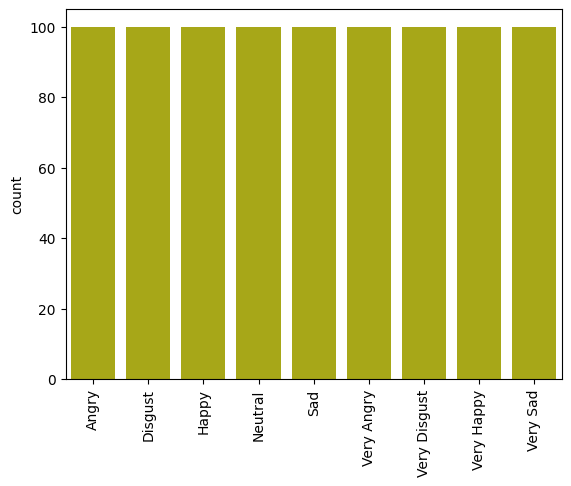

In [8]:
sns.countplot(x= label, color = "y")
plt.xticks(rotation = 90)
plt.show()

## Read and Plot the data

In [11]:
def read_plot(data, plot_title):
    
    signal, sr = librosa.load(data)
    pd.Series(signal).plot(figsize = (10,5), lw = 1, title = plot_title)
    plt.show()
    return ipd.Audio(data)

Angry

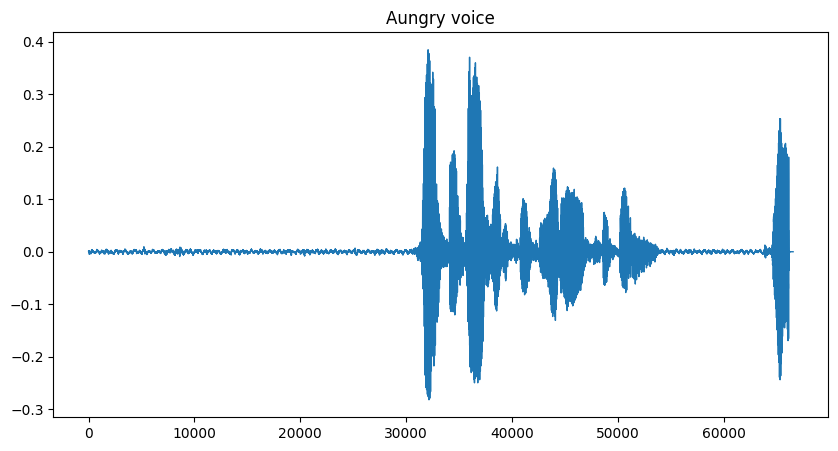

In [12]:
# Plot angry audio
# play an audio

read_plot(kbes[0], "Aungry voice")

Disgust

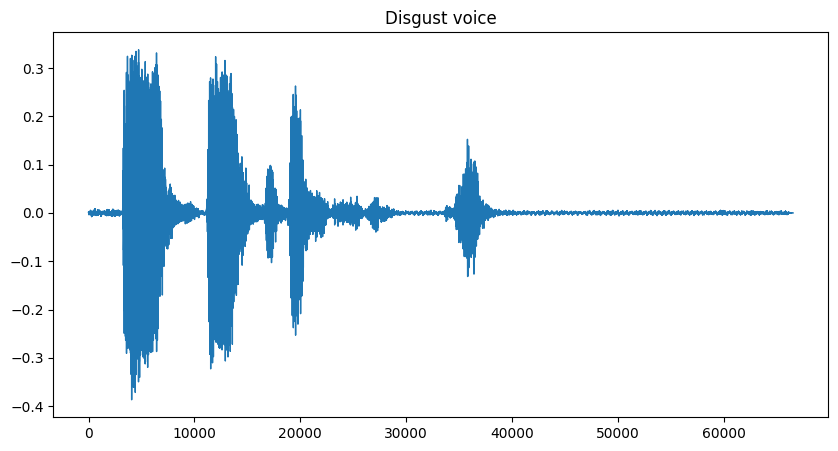

In [13]:
# Plot disgust audio
#play disgust audio

read_plot(kbes[100], "Disgust voice")

Happy

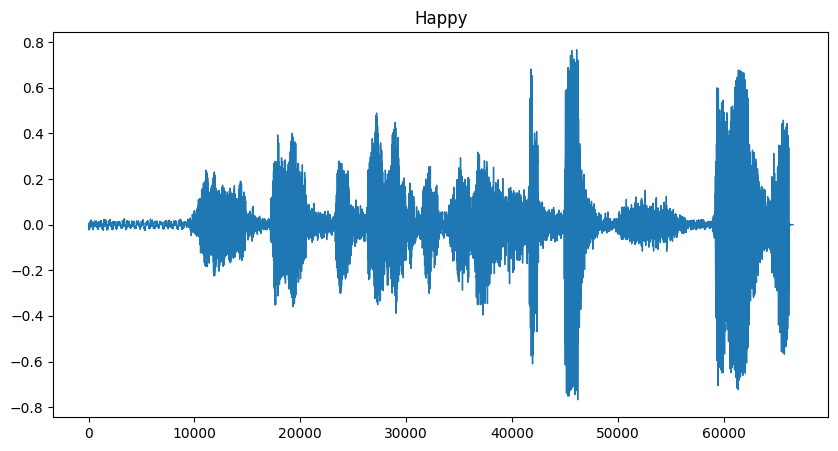

In [14]:
# Plot Happy audio
#play Happy audio

read_plot(kbes[200], "Happy")

Neutral

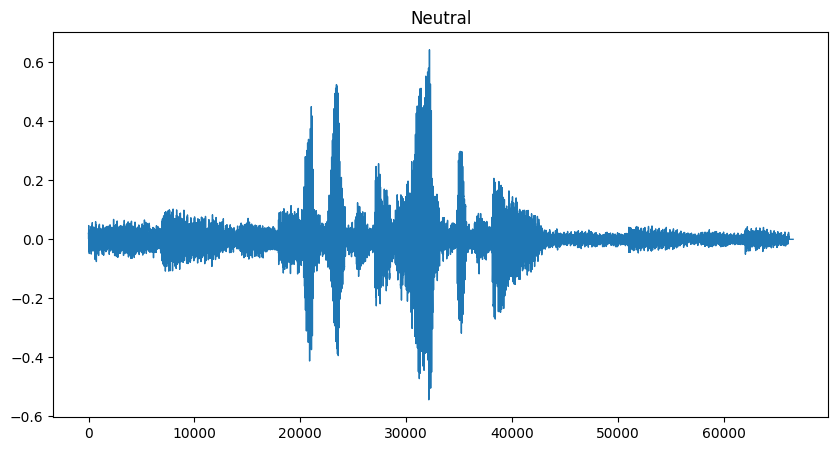

In [16]:
# Plot Neutral audio
#play Neutral audio

read_plot(kbes[300], "Neutral")

Sad

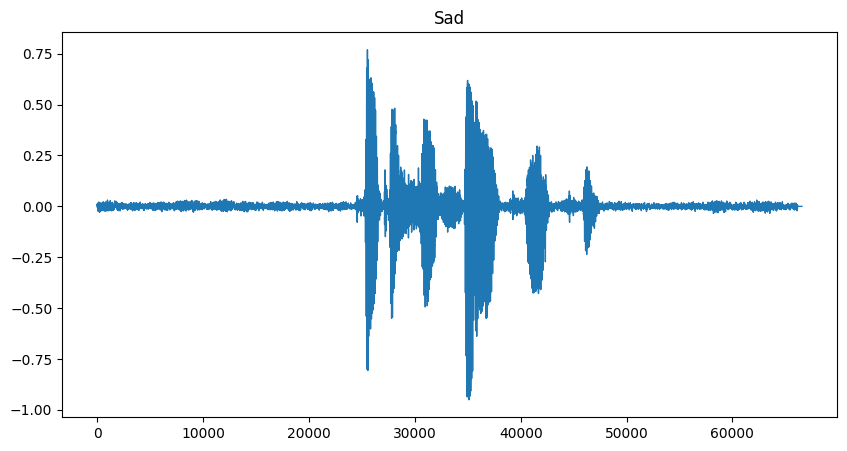

In [17]:
# Plot sad audio
# play sad audio

read_plot(kbes[400], "Sad")

Very Angry

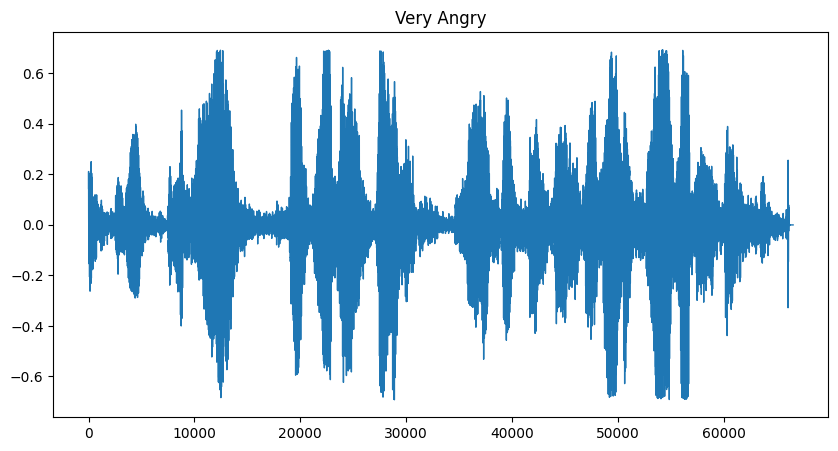

In [18]:
# Plot very angry audio
# play very angry audio

read_plot(kbes[500], "Very Angry")

Very Disgust

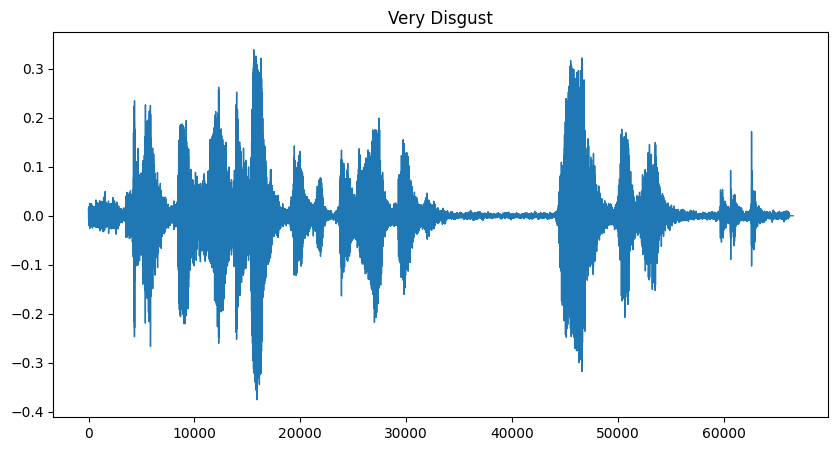

In [19]:
# Plot very Disgust audio
# play very Disgust audio

read_plot(kbes[600], "Very Disgust")

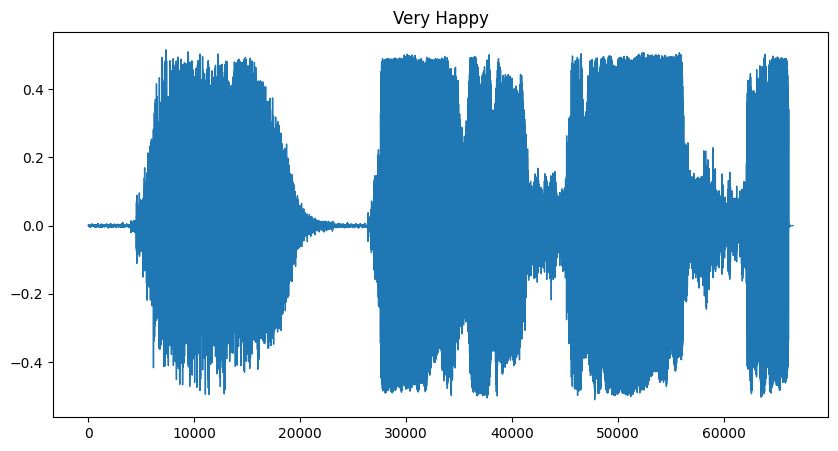

In [20]:
# Plot very Happy audio
# play very Happy audio

read_plot(kbes[700], "Very Happy")

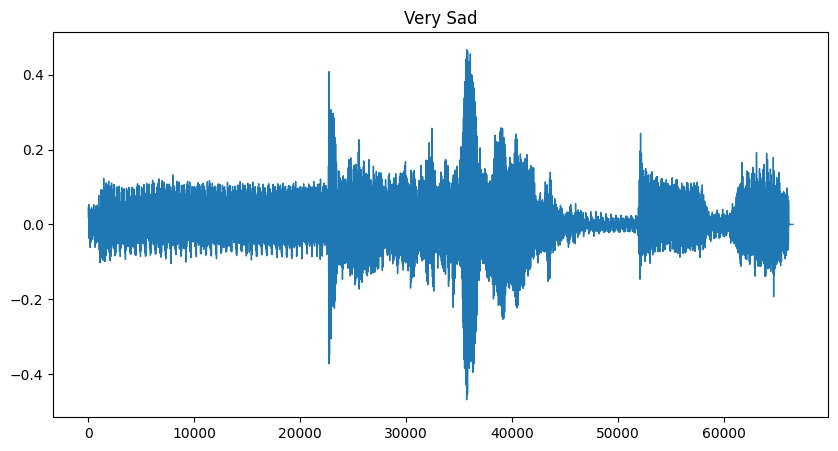

In [21]:
# Plot very Sad audio
# play very Sad audio

read_plot(kbes[800], "Very Sad")

## Amplitude Envelope

In [23]:
#Read the dataset
def read_data(data):
    signal, _ = librosa.load(data)
    return signal

# Amplitude Envelop
def amplitude_envelop(signal, frame_size, hop_length):

    # Calculate amplitude envelop
    amplitude_envelop = []
    for i in range(0, len(signal), hop_length):
        calculate_frame_amplitude_envelop = max(signal[i : i + frame_size])
        amplitude_envelop.append(calculate_frame_amplitude_envelop)
    return np.array(amplitude_envelop)

# plot amplitude evelop
def plot(signal, amplitude_envelop, hop_length, color, ylabel, title):
    
    # Time calculation
    frame = range(0, amplitude_envelop.size)
    t = librosa.frames_to_time(frame, hop_length = 512)

    # igure
    plt.figure(figsize = (10,5))
    librosa.display.waveshow(signal, alpha = 0.5)
    plt.plot(t, amplitude_envelop, color = color)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [24]:
# Combined all of them for Plot
def plot_ae(data, frame_size, hop_length, color, ylabel, title):
    signal = read_data(data)
    ae = amplitude_envelop(signal, frame_size, hop_length)
    plot(signal, ae, hop_length, color,ylabel, title)

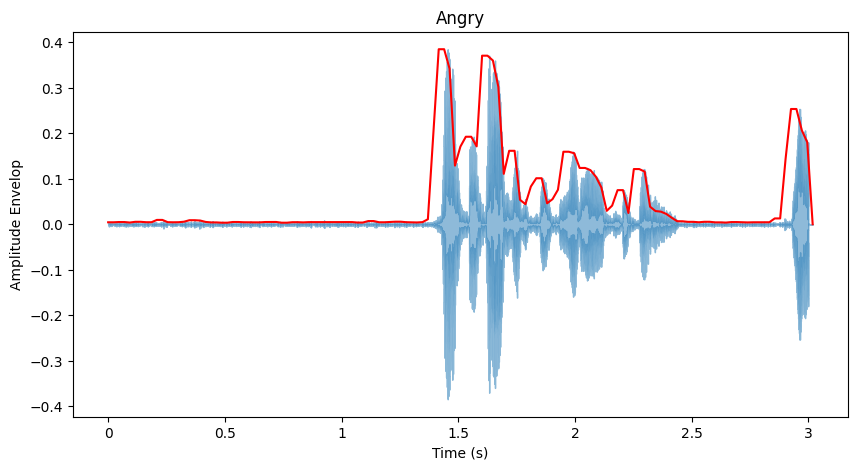

In [26]:
plot_ae(kbes[0], 1024, 512, "r", "Amplitude Envelop", "Angry")

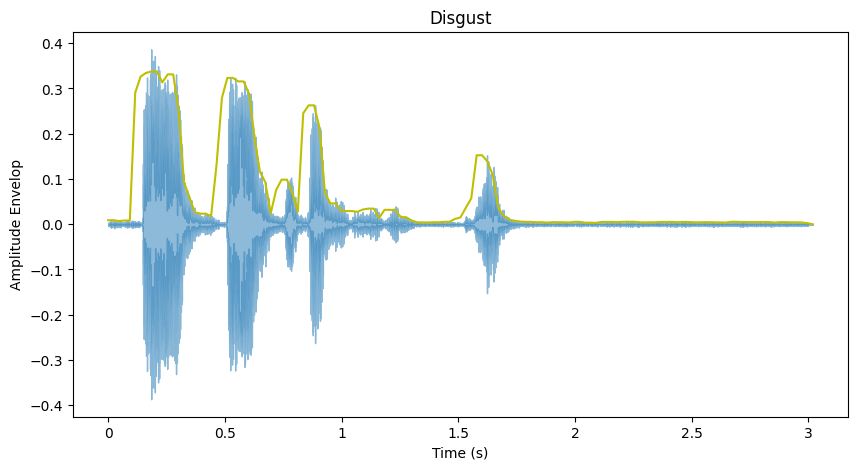

In [27]:
plot_ae(kbes[100], 1024, 512, "y", "Amplitude Envelop", "Disgust")

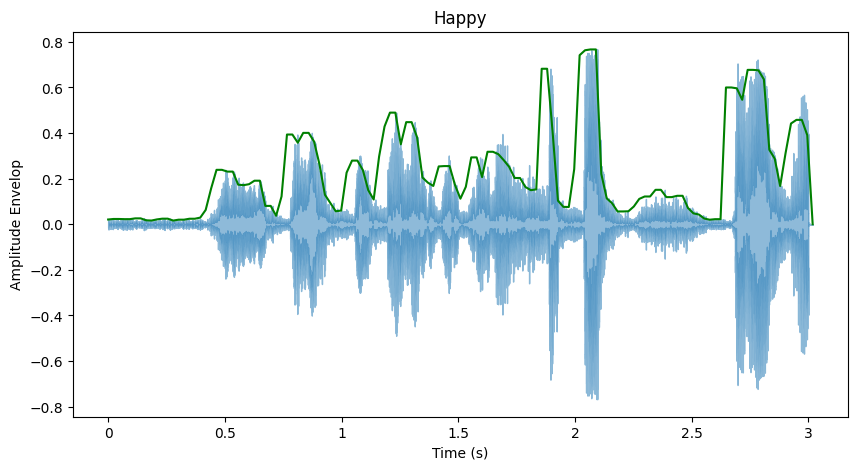

In [28]:
plot_ae(kbes[200], 1024, 512, "g", "Amplitude Envelop", "Happy")

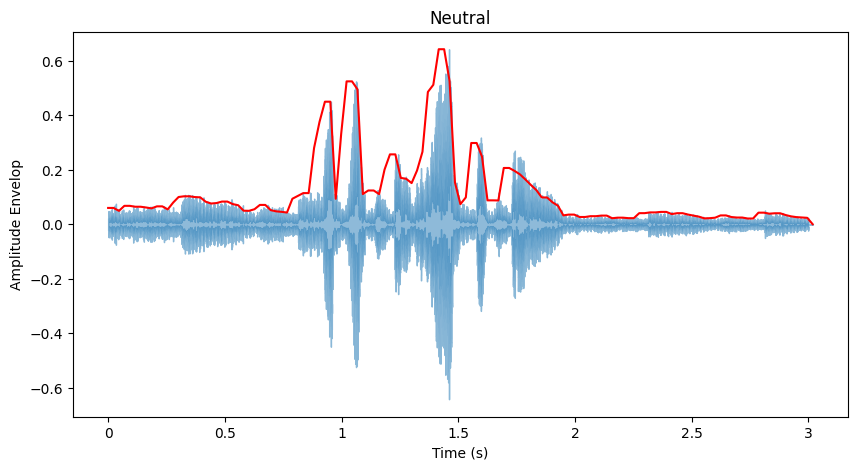

In [29]:
plot_ae(kbes[300], 1024, 512, "r", "Amplitude Envelop", "Neutral")

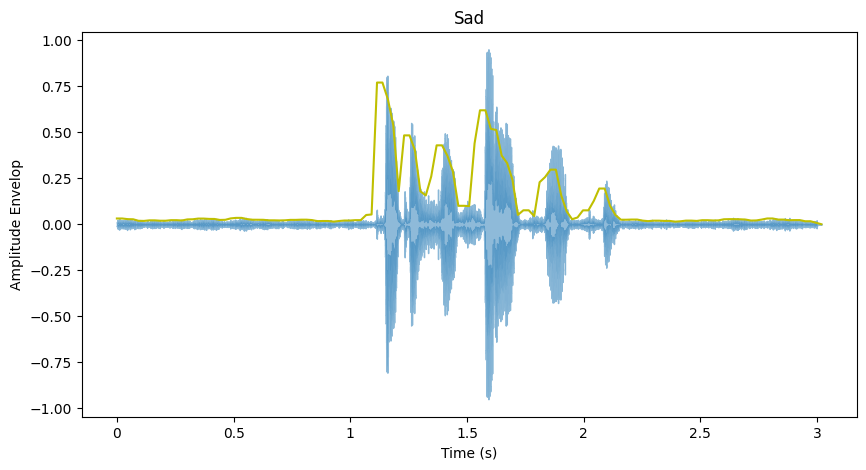

In [30]:
plot_ae(kbes[400], 1024, 512, "y", "Amplitude Envelop", "Sad")

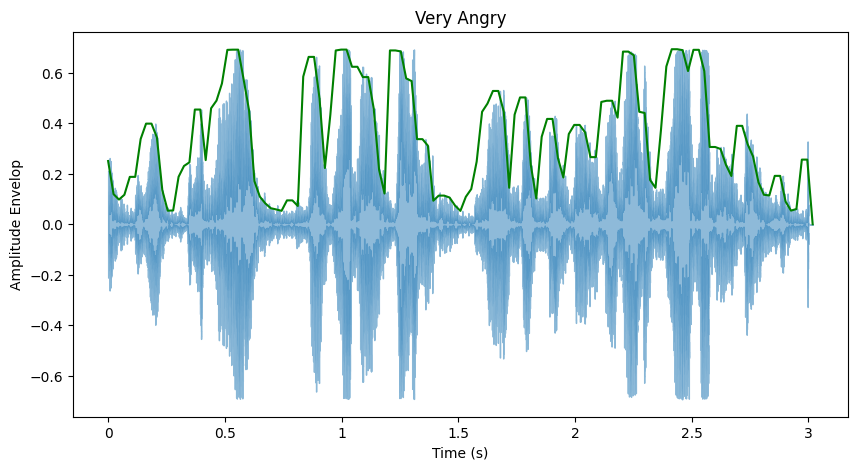

In [31]:
plot_ae(kbes[500], 1024, 512, "g", "Amplitude Envelop", "Very Angry")

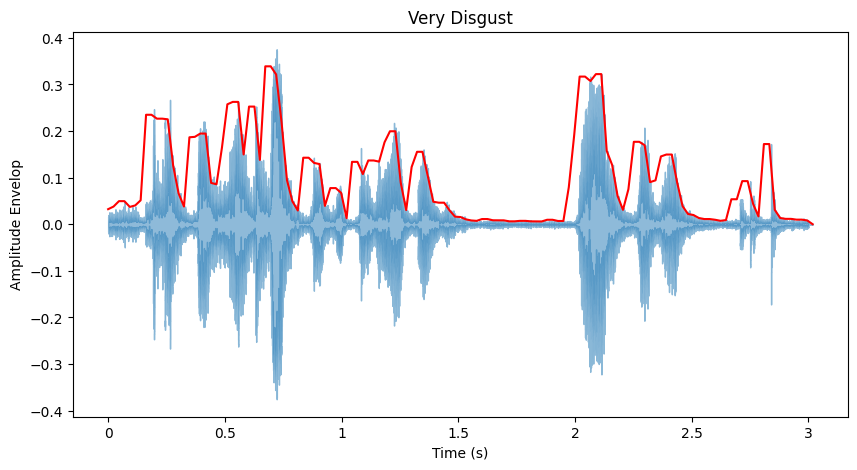

In [32]:
plot_ae(kbes[600], 1024, 512, "r", "Amplitude Envelop", "Very Disgust")

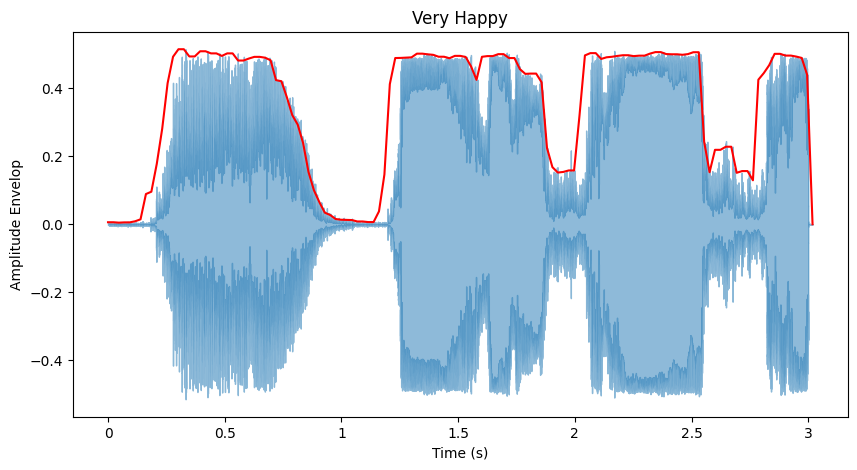

In [33]:
plot_ae(kbes[700], 1024, 512, "r", "Amplitude Envelop", "Very Happy")

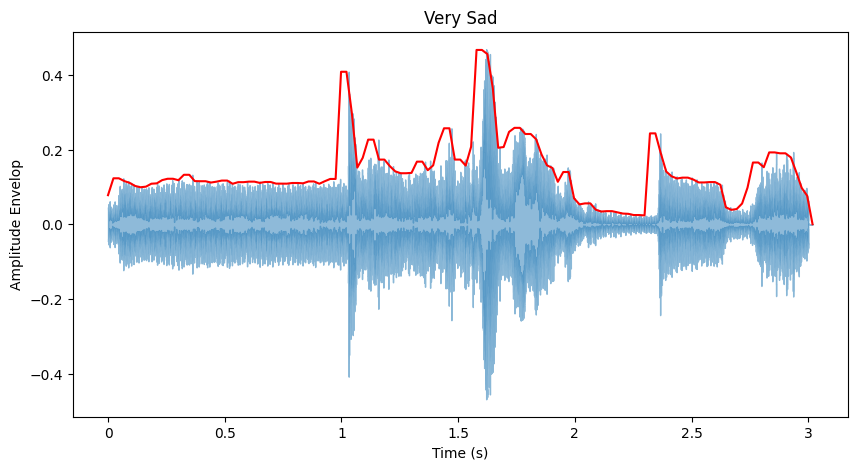

In [34]:
plot_ae(kbes[800], 1024, 512, "r", "Amplitude Envelop", "Very Sad")

### Root Mean Squre Error

In [35]:
def rms(signal, frame_size, hop_length):
    rms = []
    for i in range(0, len(signal), hop_length):
        calculate_each_frame_rms = np.sqrt(np.sum(signal[i : i+frame_size]**2 )/ frame_size)
        rms.append(calculate_each_frame_rms)
    return np.array(rms)

In [36]:
def plot_rms(data, frame_size, hop_length, color, ylabel, title):
    signal = read_data(data)
    rms_ = rms(signal, frame_size, hop_length)
    plot(signal, rms_, hop_length, color, ylabel, title)

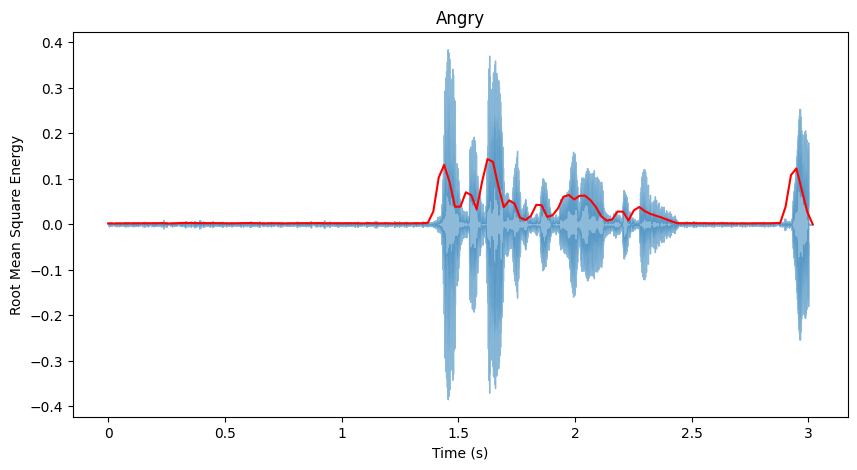

In [41]:
plot_rms(kbes[0], 1024, 512, "r", "Root Mean Square Energy", "Angry")

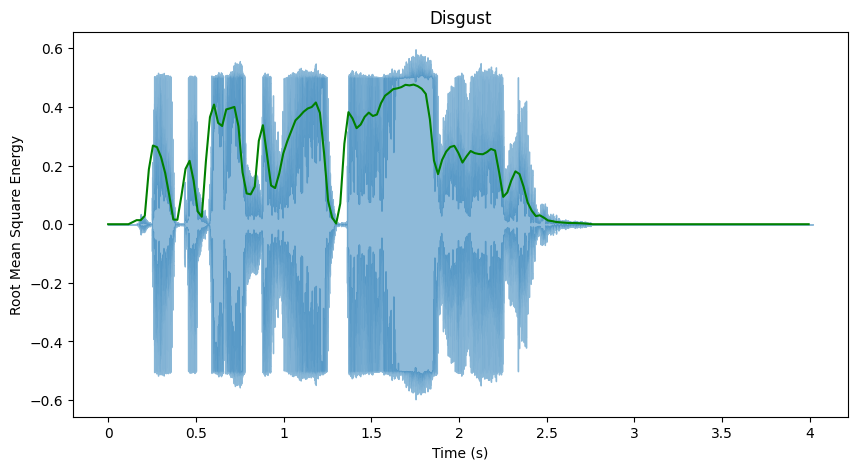

In [400]:
plot_rms(subesco[5], 1024, 512, "g", "Root Mean Square Energy", "Disgust")

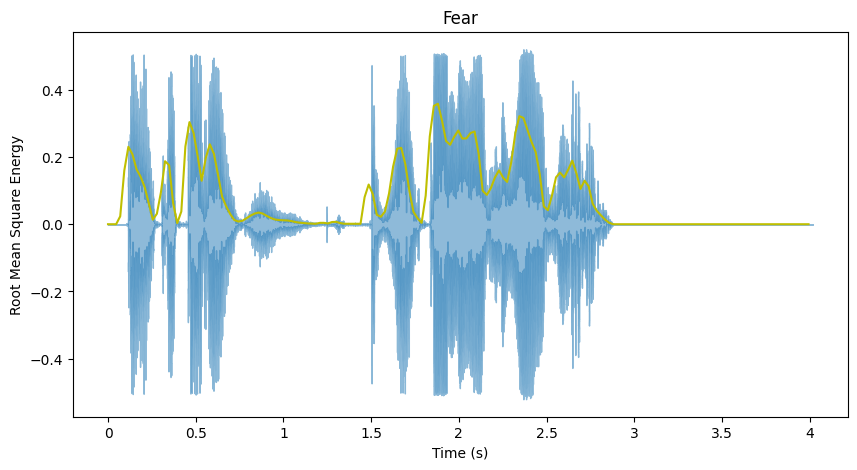

In [401]:
plot_rms(subesco[10], 1024, 512, "y", "Root Mean Square Energy", "Fear")

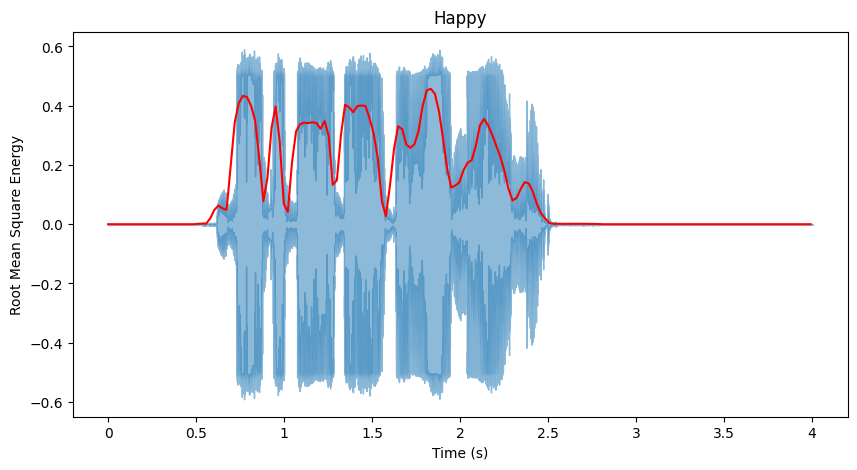

In [402]:
plot_rms(subesco[15], 1024, 512, "r", "Root Mean Square Energy", "Happy")

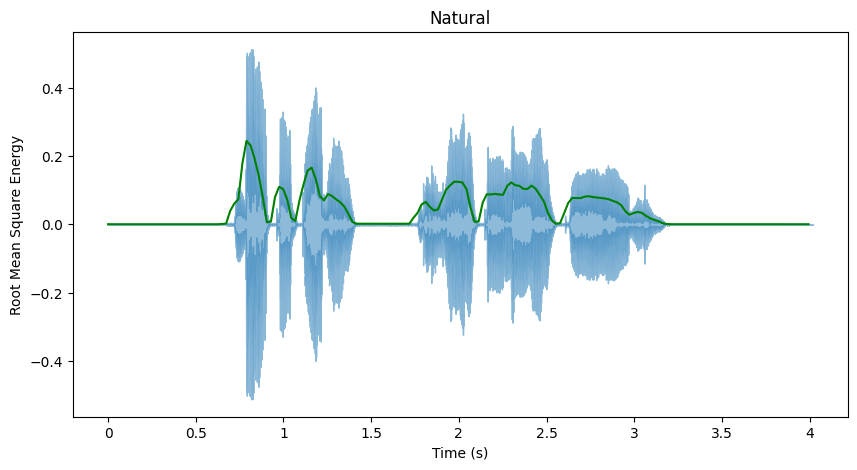

In [403]:
plot_rms(subesco[20], 1024, 512, "g", "Root Mean Square Energy", "Natural")

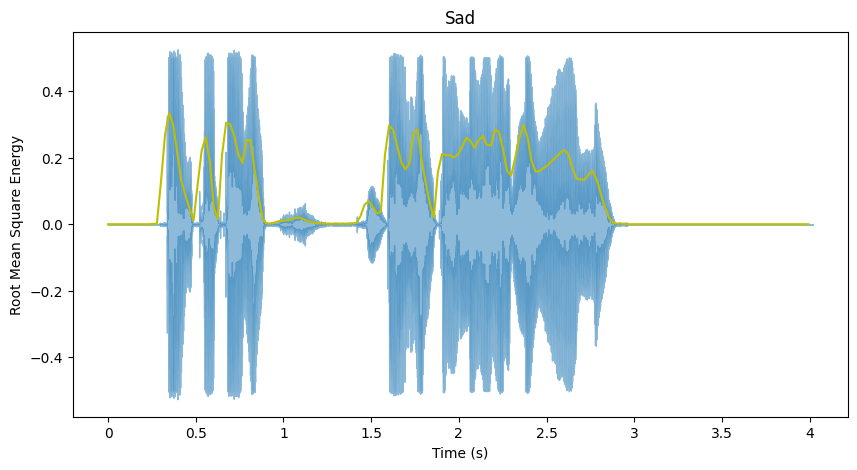

In [404]:
plot_rms(subesco[25], 1024, 512, "y", "Root Mean Square Energy", "Sad")

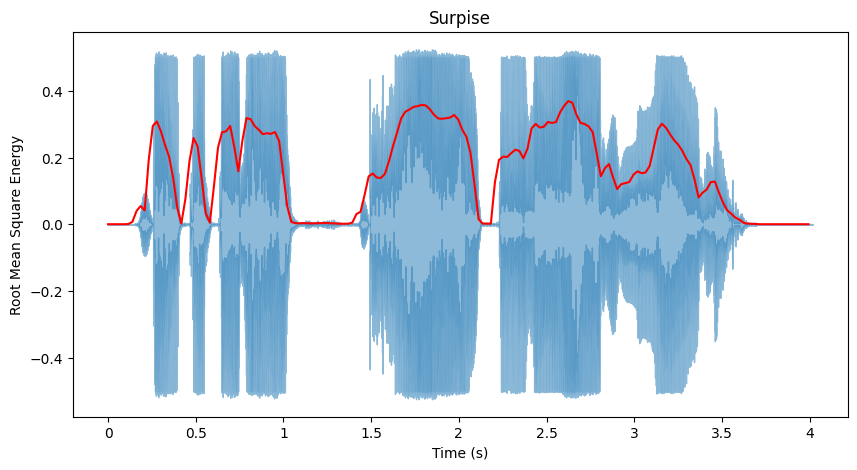

In [405]:
plot_rms(subesco[30], 1024, 512, "r", "Root Mean Square Energy", "Surpise")

### Zero Crossing Rate

In [38]:
def zcr(signal, frame_size, hop_length):
    zcr = librosa.feature.zero_crossing_rate(signal, frame_length = frame_size, hop_length = hop_length)[0]
    return zcr

In [39]:
def plot_zcr(data, frame_size, hop_length, color, ylabel, title):
    signal = read_data(data)
    signal_trim, sr = librosa.effects.trim(signal, top_db = 20) # Every emotion langth is not same, It's a big probelm
    zcr_ = zcr(signal_trim, frame_size, hop_length)             # Without Trim ZCR affected by the silent.....
    frame = range(0, zcr_.size)
    t = librosa.frames_to_time(frame, hop_length = 512)
    plt.plot(t, zcr_, color = color)
    plt.xlabel("Time(s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

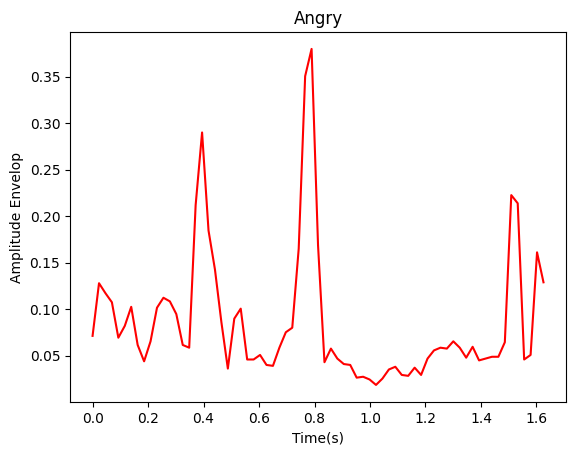

In [40]:
plot_zcr(kbes[0], 1024, 512, "r", "Amplitude Envelop", "Angry")

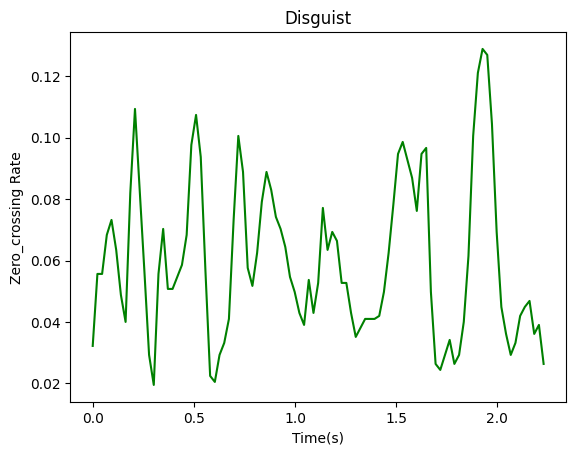

In [410]:
plot_zcr(subesco[5], 1024, 512, "g", "Zero_crossing Rate", "Disguist")

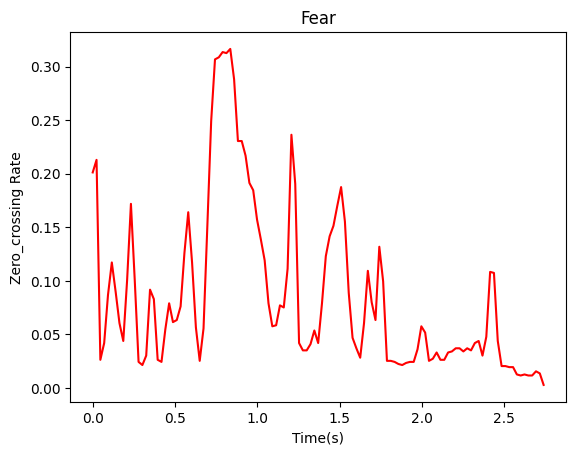

In [411]:
plot_zcr(subesco[10], 1024, 512, "r", "Zero_crossing Rate", "Fear")

### Fourier Transform

Angry

In [412]:
signal, sr = librosa.load(subesco[0])

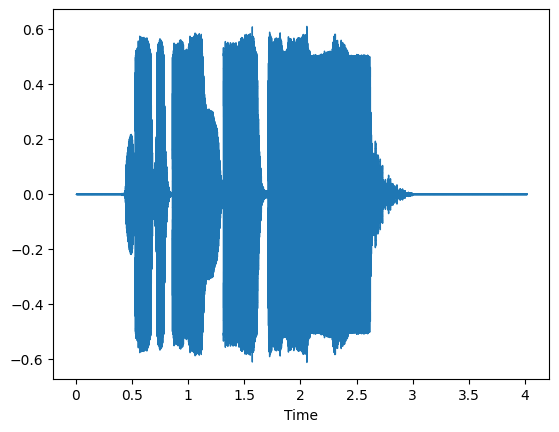

In [413]:
librosa.display.waveshow(signal)
plt.show()

<Axes: >

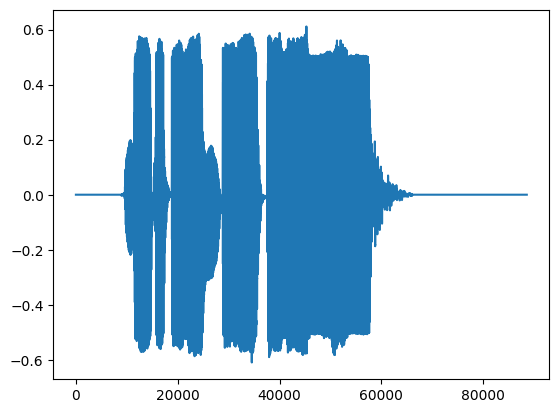

In [414]:
pd.Series(signal).plot()

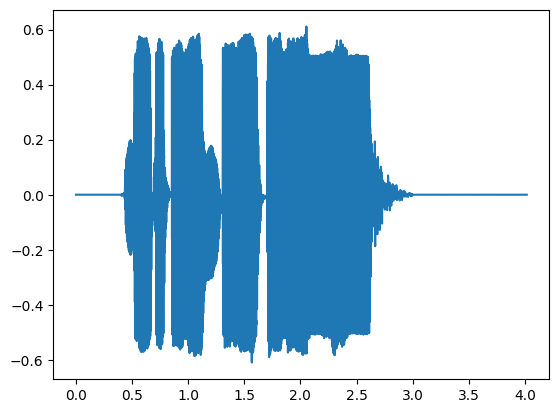

In [415]:
sample = range(len(signal))
t = librosa.samples_to_time(sample, sr = sr)
plt.plot(t, signal)

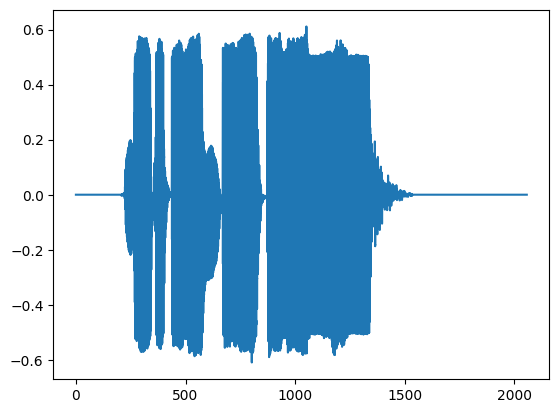

In [416]:
frame = range(len(signal))
t = librosa.frames_to_time(frame, sr = sr)
plt.plot(t, signal)

In [417]:
d = 1/sr
d

4.5351473922902495e-05

In [418]:
d_512 = 1/512
d_512

0.001953125

In [419]:
duration_400_samples = 400*d
duration_400_samples

0.018140589569160998

In [420]:
ft = np.fft.fft(signal)

In [421]:
ft[100]

np.complex64(-65.663765-81.772125j)

Note : it's don't need for machine learning but it need for calculate spectogram 

### Magnitude Spectrum

Magnitude spectrum is a absoulate value of Fourier Transform

In [422]:
def magnitude_spectrum(data):
    # Read the dataset
    singnal, sr = librosa.load(data)

    # Calculate Fourier Transform
    fourier_transform = np.fft.fft(signal)

    # Calculate magnitude spectrum
    magnitude_spectrum = np.abs(fourier_transform)

    return (magnitude_spectrum, signal, sr)

In [423]:
# Plot
def plot(data, title, f_ratio):
    ms, signal, sr = magnitude_spectrum(data)

    plt.figure(figsize = (10,5))
    frequency = np.linspace(0, sr, len(ms))
    num_frequency_bins = int(len(frequency)*f_ratio)

    plt.plot(frequency[:num_frequency_bins], ms[:num_frequency_bins])
    plt.xlabel("Frequency(HZ)")
    plt.ylabel("Magnitude")
    plt.title(title)
    plt.show()

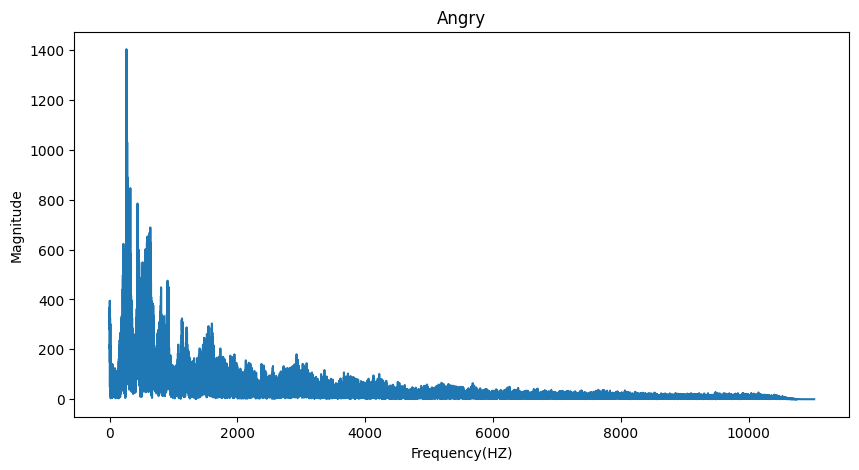

In [424]:
plot(subesco[0], "Angry", 0.5)

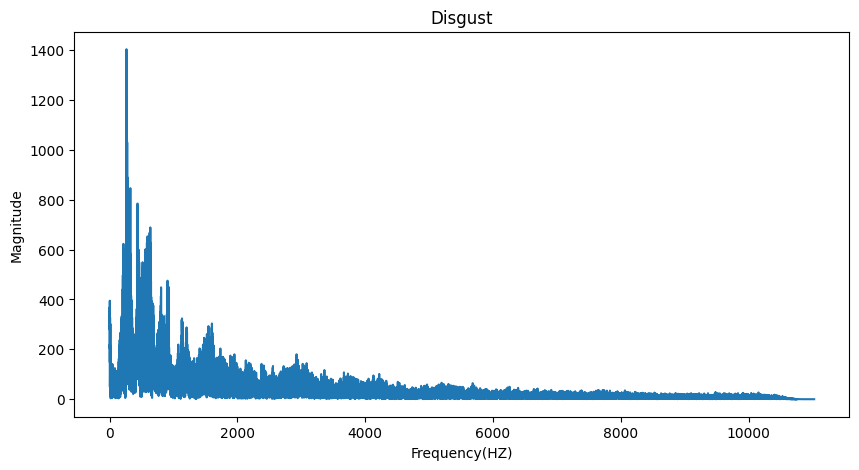

In [425]:
plot(subesco[5], "Disgust", 0.5)

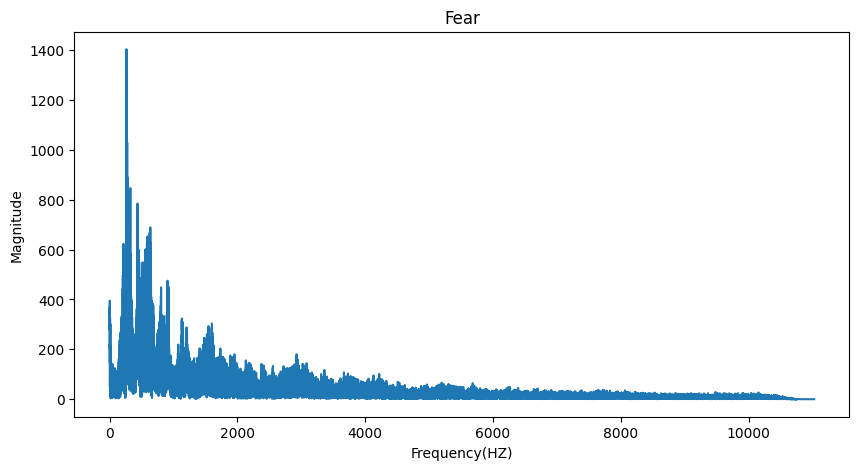

In [426]:
plot(subesco[15], "Fear", 0.5)

### Spectrogram

In [427]:
signal, sr = librosa.load(subesco[0])

In [428]:
#spectrogram
D = librosa.stft(signal)

In [429]:
s_db = librosa.amplitude_to_db(np.abs(D), ref = np.max) ## convert spectrogram to decibal for batter visualization
s_db.shape

(1025, 174)

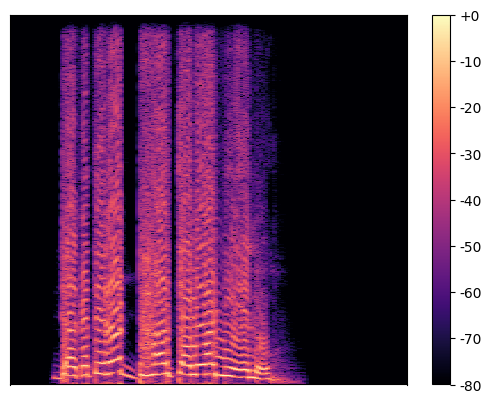

In [430]:
librosa.display.specshow(s_db)
plt.colorbar(format = "%+2.f")

In [431]:
stft = librosa.stft(signal, n_fft = 2048, hop_length = 512)

In [432]:
spectrogram = np.abs(stft)**2
spectrogram.shape

(1025, 174)

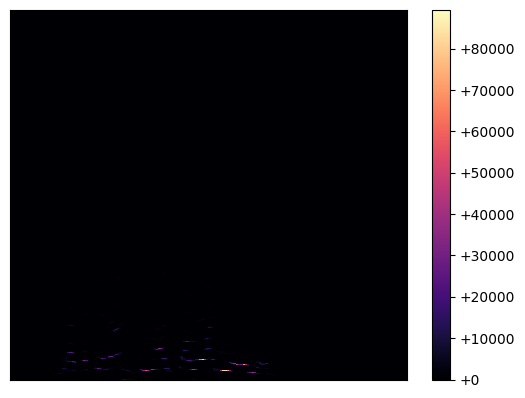

In [433]:
librosa.display.specshow(spectrogram)
plt.colorbar(format = "%+2.f")

### Mel Spectrogram

In [434]:
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
mel_spectrogram.shape

(10, 174)

In [435]:
#mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=2048, hop_length=512, n_mels=10).T.mean(axis = 1)
#mel_spectrogram.shape

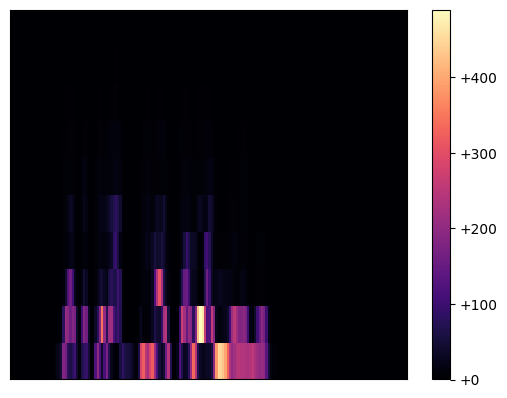

In [436]:
librosa.display.specshow(mel_spectrogram)
plt.colorbar(format = "%+2.f")

In [437]:
# log mel

log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

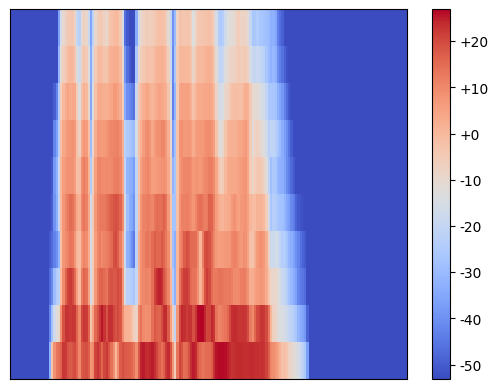

In [438]:
librosa.display.specshow(log_mel_spectrogram)
plt.colorbar(format = "%+2.f")

In [439]:
db_mel = librosa.amplitude_to_db(mel_spectrogram, ref = np.max)

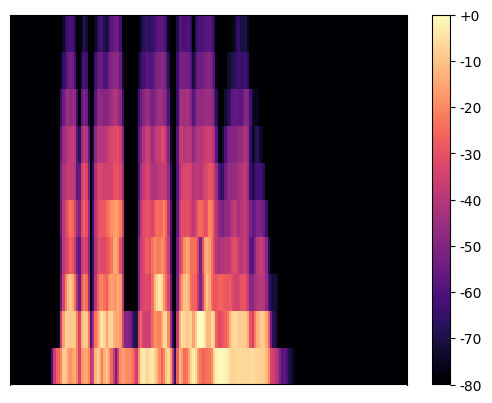

In [440]:
librosa.display.specshow(db_mel)
plt.colorbar(format = "%+2.f")

### MFCC : Mel_frequency cepstral coefficient

In [441]:
mfcc = librosa.feature.mfcc(y = signal, n_mfcc = 13, sr =sr)

In [442]:
#mfcc = librosa.feature.mfcc(y = signal, n_mfcc = 13, sr =sr).mean(axis=1)
#mfcc.shape

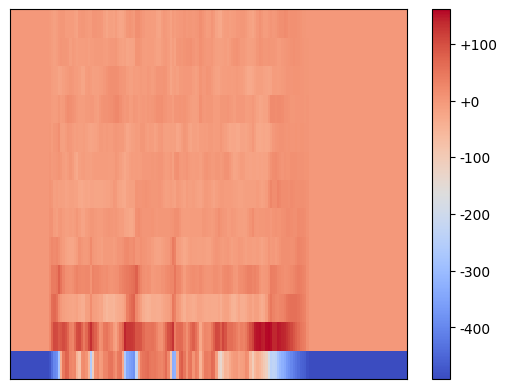

In [443]:
librosa.display.specshow(mfcc)
plt.colorbar(format = "%+2.f")

In [444]:
db_mfcc = librosa.amplitude_to_db(mfcc, ref = np.max)

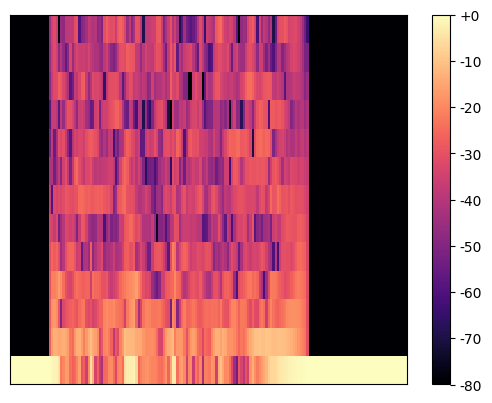

In [445]:
librosa.display.specshow(db_mfcc)
plt.colorbar(format = "%+2.f")

In [446]:
disgust, sr = librosa.load(subesco[10])

In [447]:
mfcc_disgust = librosa.feature.mfcc(y = disgust, n_mfcc = 13, sr =sr).mean()

In [448]:
mfcc_disgust

np.float32(-16.13567)

### Band Energy Ratio

In [449]:
signal, sr = librosa.load(subesco[0])

In [450]:
# Extract Spectrogram
sprctrogram = librosa.stft(signal, n_fft = 2048, hop_length = 512)

In [451]:
def calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate):

    frequency_range = sample_rate/2
    frequency_delta_per_bin = frequency_range/ spectrogram.shape[0]

    split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin)

    return int(split_frequency_bin)

In [452]:
split_frequency_bin = calculate_split_frequency_bin(spectrogram, 2000, 22050)

In [453]:
split_frequency_bin

185

In [454]:
def calcualte_band_energy_ratio(spectrogaram, split_frequency, sample_rate):

    split_frequency_bin = calculate_split_frequency_bin(spectrogram, split_frequency, sample_rate)

    # Move to power spectrogram
    power_spec = (np.abs(spectrogram)**2).T

    band_energy_ratio = []

    #calculate band energy ratio for each frame 
    for frequency_in_frame in power_spec:
        sum_power_low_frequencies = np.sum(frequency_in_frame[:split_frequency_bin])
        sum_power_high_frequencies = np.sum(frequency_in_frame[split_frequency_bin:])

        BER_current_frame = sum_power_low_frequencies/sum_power_high_frequencies

        band_energy_ratio.append(BER_current_frame)
        
    return np.array(band_energy_ratio)
    

In [455]:
BER = calcualte_band_energy_ratio(spectrogram, 2000, sr)

In [456]:
BER.shape

(174,)

In [457]:
frames = range(len(BER))
t1 = librosa.frames_to_time(frames, hop_length = 512)

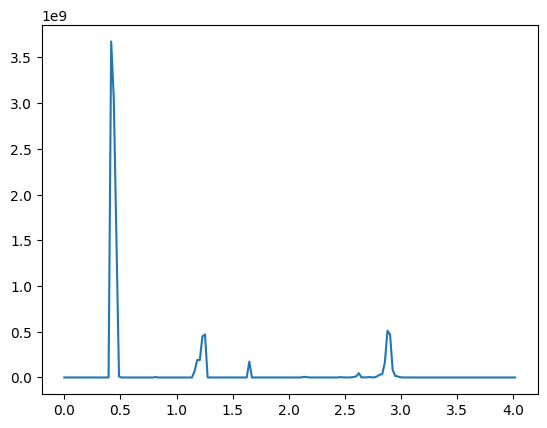

In [458]:
plt.plot(t1, BER)

### Spectral Centroid

In [459]:
sc = librosa.feature.spectral_centroid(y = signal, sr = sr, n_fft = 2048, hop_length = 512)[0]

In [460]:
sc.shape

(174,)

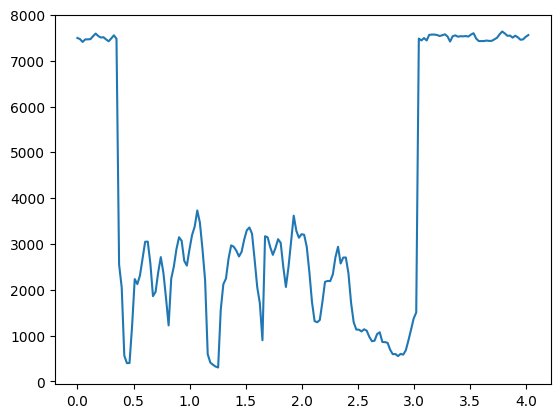

In [461]:
plt.plot(t1, sc)

### Spectral Bandwith

In [462]:
SB = librosa.feature.spectral_bandwidth(y=signal, sr=sr, n_fft=2048, hop_length=512)[0]

In [463]:
SB.shape

(174,)

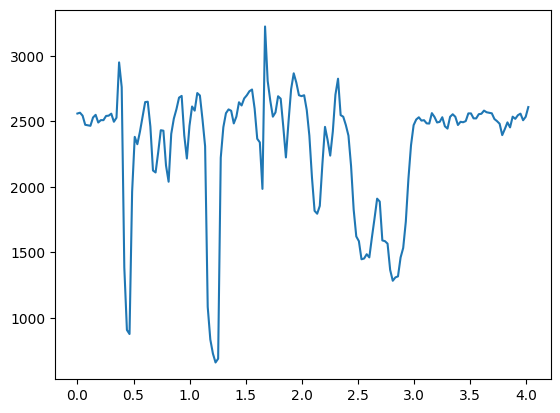

In [464]:
plt.plot(t1, SB)